<a href="https://colab.research.google.com/github/tsatir/Thinkful-Data_Science/blob/master/t_testcheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
houseprice = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/homeprices.applied.econ.csv")
houseprice.info()

houseprice.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


**Do homes with air conditioning have a higher sales price than homes without air conditioning?**

My null hypothesis is the population of houseprices with air conditioning on average have higher sales price comparing with the homes without air conditioning.

In [6]:
with_aircond = houseprice[(houseprice["airco"]=="yes")]
with_aircond.info()

no_aircond = houseprice[(houseprice["airco"]=="no")]
no_aircond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 373 to 545
Data columns (total 12 columns):
price       173 non-null float64
lotsize     173 non-null int64
bedrooms    173 non-null int64
bathrms     173 non-null int64
stories     173 non-null int64
driveway    173 non-null object
recroom     173 non-null object
fullbase    173 non-null object
gashw       173 non-null object
airco       173 non-null object
garagepl    173 non-null int64
prefarea    173 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 17.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 12 columns):
price       373 non-null float64
lotsize     373 non-null int64
bedrooms    373 non-null int64
bathrms     373 non-null int64
stories     373 non-null int64
driveway    373 non-null object
recroom     373 non-null object
fullbase    373 non-null object
gashw       373 non-null object
airco       373 non-null object
garagepl    373 non-null int

We have nearly twice the number of houses without air conditioning as with air conditioning. A difference in sample size is *not* an issue for an independent samples t-test. Each sample is large enough and should give reliable estimates, given the data meets the rest of our assumptions.

Let's check the samples are normally distributed.

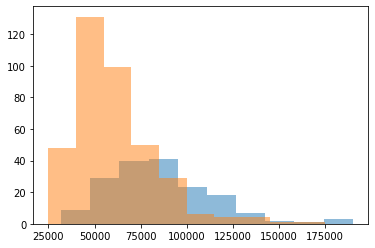

In [11]:
plt.hist(with_aircond['price'], alpha = .5)
plt.hist(no_aircond['price'], alpha = .5)
plt.show()

It appears from the histograms that houses without airconditioning data does not fit a bell curve. 

To confirm, let's also retrieve the  exact measures of skewness and kurtosis. 
Skewness should be between -1.5 and +1.5 and
Kurtosis should be between -2.5 and +2.5

In [12]:
print(stats.describe(with_aircond['price']))
print(stats.describe(no_aircond['price']))

DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)
DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)


From both the histograms and the statistics, it appears that the samples of this variable are not normally distributed. I will stop our analysis.
. 

**Do homes with a full basement have a higher sales price than homes without a full basement?**

In [13]:
houseprice.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


In [15]:
with_basement = houseprice[(houseprice['fullbase']=='yes')]
with_basement.info()


no_basement = houseprice[(houseprice['fullbase'] == 'no')]
no_basement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 438
Data columns (total 12 columns):
price       191 non-null float64
lotsize     191 non-null int64
bedrooms    191 non-null int64
bathrms     191 non-null int64
stories     191 non-null int64
driveway    191 non-null object
recroom     191 non-null object
fullbase    191 non-null object
gashw       191 non-null object
airco       191 non-null object
garagepl    191 non-null int64
prefarea    191 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 19.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 125 to 545
Data columns (total 12 columns):
price       355 non-null float64
lotsize     355 non-null int64
bedrooms    355 non-null int64
bathrms     355 non-null int64
stories     355 non-null int64
driveway    355 non-null object
recroom     355 non-null object
fullbase    355 non-null object
gashw       355 non-null object
airco       355 non-null object
garagepl    355 non-null int

In [0]:
filtered_with_basement = with_basement[(with_basement['price']) <= 110000]
filtered_no_basement = no_basement[(no_basement['price']) <= 110000]

(array([16., 39., 76., 49., 55., 26., 22., 18., 16., 16.]),
 array([ 25000.,  33500.,  42000.,  50500.,  59000.,  67500.,  76000.,
         84500.,  93000., 101500., 110000.]),
 <a list of 10 Patch objects>)

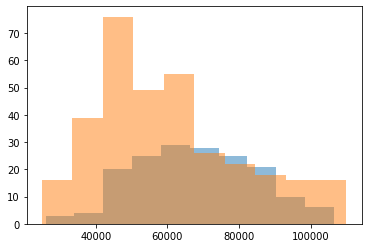

In [27]:

plt.hist(filtered_with_basement['price'], alpha=.5) #outliers
plt.hist(filtered_no_basement['price'], alpha=.5)

Houses with basemant after 110K, has some misleading values.In order to clean data, I reomove those from table. 

In [29]:
print(stats.describe(filtered_no_basement['price']))
print(stats.describe(filtered_with_basement['price']))

DescribeResult(nobs=333, minmax=(25000.0, 110000.0), mean=60156.006006006006, variance=409255695.89755416, skewness=0.6431928082737368, kurtosis=-0.343034895746658)
DescribeResult(nobs=171, minmax=(26000.0, 106500.0), mean=68033.04093567251, variance=275407122.4630203, skewness=0.07413534214273323, kurtosis=-0.5303877948680293)


In [31]:
stats.ttest_ind(filtered_no_basement['price'],filtered_with_basement['price'])

Ttest_indResult(statistic=-4.388940036966435, pvalue=1.3893844147426536e-05)

Ttes statistic is -4.38 which is smaller than 1.96. And, pvalue is extremelly small. So, we can say that There is a .001% chance of observing a difference as large as what is observed even if the two population means are identical (the null hypothesis is true)

In [32]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(filtered_no_basement['price'],filtered_with_basement['price'])

'The difference in means at the 95% confidence interval (two-tail) is between 4574.237742456163 and 11179.832116876853.'

[[Text(0, 0, 'fullbase_yes'), Text(0, 0, 'fullbase_no')]]

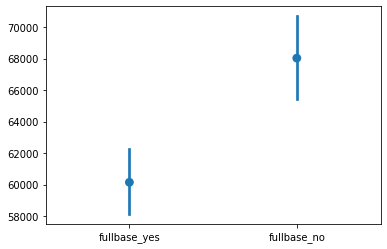

In [33]:
import seaborn as sns

g = sns.pointplot(data=[filtered_no_basement['price'],filtered_with_basement['price']], join=False)
                        
g.set(xticklabels = ['fullbase_yes', 'fullbase_no'])